# 01.Dados Textuais: classificação e exploração.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state=42)

In [4]:
treino

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [5]:
teste

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
                               ...                        
16421    Crescendo como filho do cinema, uma das trilog...
39861    Este filme é o melhor filme de todos os tempos...
309      "Electra Glide in Blue" é um movimento lento e...
20638    Eu amo esse filme ! Eu acho que já vi 5 vezes ...
38935    Eu vi alguns filmes sobre transtornos alimenta...
Name: text_pt, Length: 12365, dtype: object

In [6]:
classe_treino

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [7]:
classe_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [8]:
# Este trecho irá falhar pois as palavras não foram 'tokenizadas' ainda. 
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

In [9]:
print('Negativa \n')
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [10]:
print('Positiva \n')
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [11]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [12]:
classificacao = resenha.sentiment.replace(['neg', 'pos'], [0, 1])
classificacao

/tmp/ipykernel_34643/2418312977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha.sentiment.replace(['neg', 'pos'], [0, 1])


0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [13]:
resenha['classificacao'] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [14]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# 02.Bag of Words: criando representações da linguagem humana.

## Usando Dados Rotulados


No curso nós estamos usando o _dataset_ IMDB, ele contém críticas de filmes e seu respectivo sentimento, positivo ou negativo. Talvez algo que você possa estar se perguntando é se os dados não estivessem classificados, ou seja se nosso _dataset_ fosse apenas de texto sem o rótulo de sentimento? Será que ainda seria possível classificar sentimentos? Como poderíamos identificar os sentimentos positivos e negativos?

Bom quando temos dados rotulados podemos utilizar algoritmos de machine learning supervisionado para realizar a classificação de sentimento. Basicamente nos métodos supervisionados temos um "professor" (rótulos) que servem para avaliar a resposta (previsões) e assim o modelo vai se adaptando de acordo com as orientações do "professor". Agora se não temos os dados rotulados podemos utilizar algoritmos de machine learning não supervisionados, ou seja, nesta forma de aprendizagem não temos o "professor" portanto o algoritmo utilizado terá que descobrir sozinho relações, padrões, regularidades e categorias nos dados.

Então caso os nossos dados não fossem rotulados com os sentimentos poderíamos utilizar técnicas de aprendizado não supervisionado para encontrar categorias que iriam representar o sentimento negativo e positivo. OK, mas você pode ser perguntar, e se eu não quiser usar o aprendizado não supervisionado, o que fazer?

Neste caso temos algumas saídas, a primeira é ler todas as resenhas e você mesmo classificar como positivo ou negativo e depois usar aprendizado supervisionado. Mais uma maneira é usar um modelo treinado com uma outra fonte de dados rotulados e aplica-lo para classificar os dados de interesse (quando tiver que usar essa abordagem, o ideal é buscar modelos treinados com uma base de dados o mais similar possível com a base que deseja classificar).

Caso você queria entender mais sobre aprendizado supervisionado e não supervisionado, pode fazer os cursos de [aprendizado supervisionado](https://cursos.alura.com.br/course/machine-learning-aprendizado-supervisionado) e [aprendizado não supervisionado](https://cursos.alura.com.br/course/machine-learning-algoritmos-nao-supervisionados).

In [15]:
texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [16]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [17]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [18]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [19]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
bag_of_words.shape

(49459, 50)

In [20]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha.classificacao,
                                                              random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print('Acurácia: %.4f' % acuracia)

Acurácia: 0.6583


In [21]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                texto[coluna_classificacao],
                                                                random_state=42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [22]:
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


# 03.Visualizando os dados com WordCloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(
    width=800,
    height=500,
    max_font_size=110,
    collocations=False
).generate(todas_palavras)

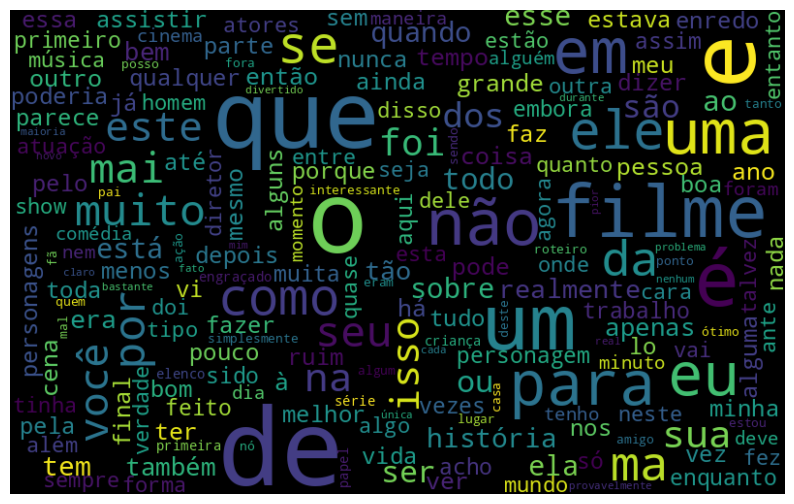

In [25]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False
    ).generate(todas_palavras)

    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [27]:

def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False
    ).generate(todas_palavras)

    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

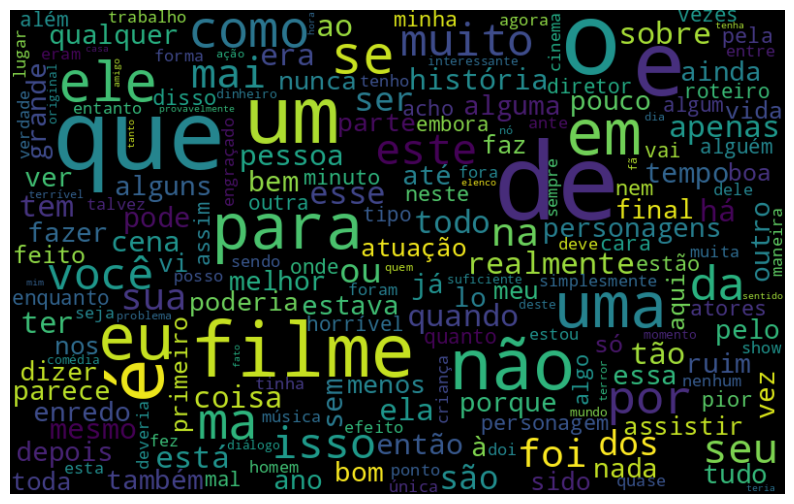

In [28]:
nuvem_palavras_neg(resenha, 'text_pt')

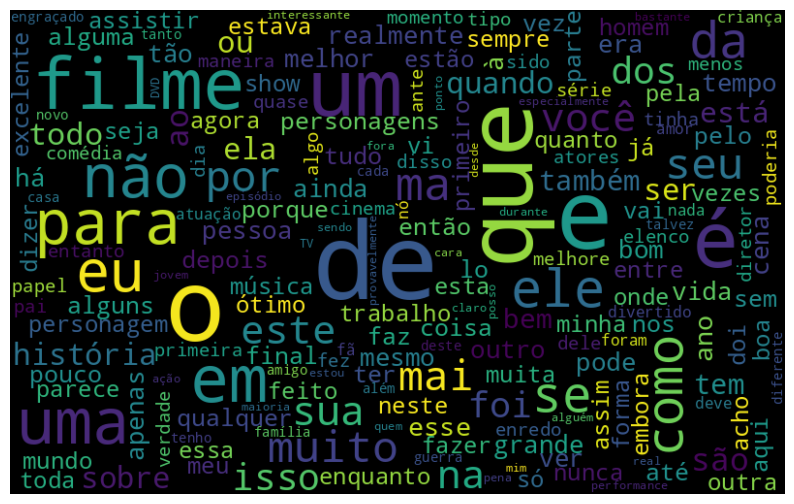

In [29]:
nuvem_palavras_pos(resenha, 'text_pt')

# 04.Tokenização e a biblioteca NLTK

In [30]:
import nltk

# nltk.download('all')

In [31]:
frase = ['um filme ruin', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruin': 1, 'um filme bom': 1})

In [32]:
frase = 'Bem vindo ao mundo do PLN!'
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [33]:
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

In [34]:
df_frequencia.nlargest(n=10, columns='Frequência')

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# 05.Uma nova visualização e os stop words

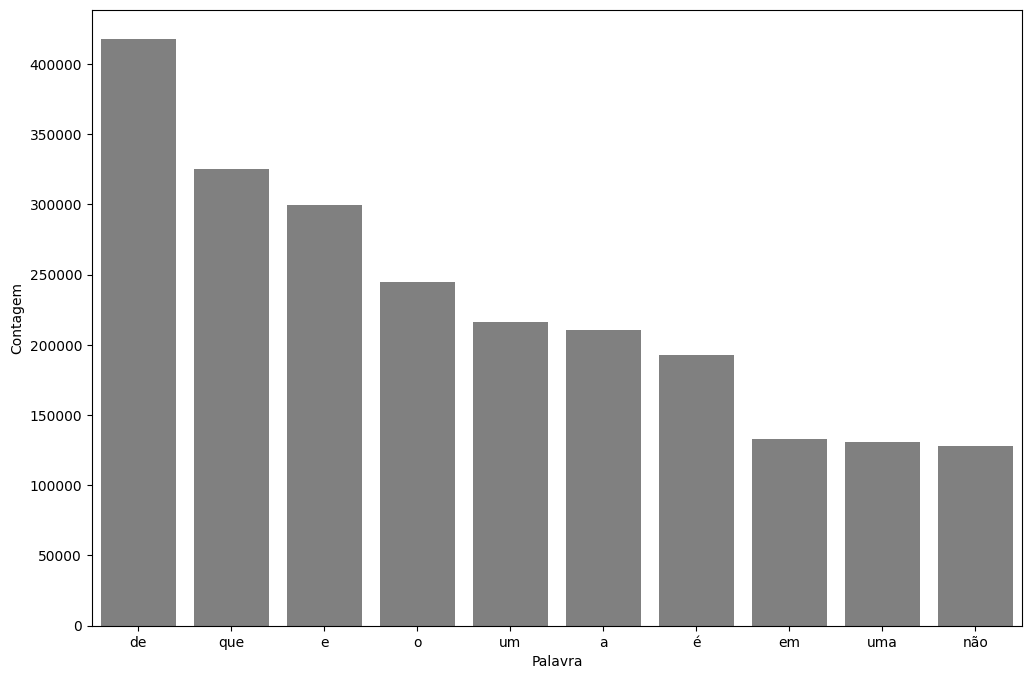

In [35]:
import seaborn as sns

df_frequencia = df_frequencia.nlargest(columns='Frequência', n=10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequência', color='gray')
ax.set_ylabel('Contagem')
plt.show()

In [46]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                'Frequência': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns='Frequência', n=quantidade)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequência', color='gray')
    ax.set_ylabel('Contagem')
    plt.show()

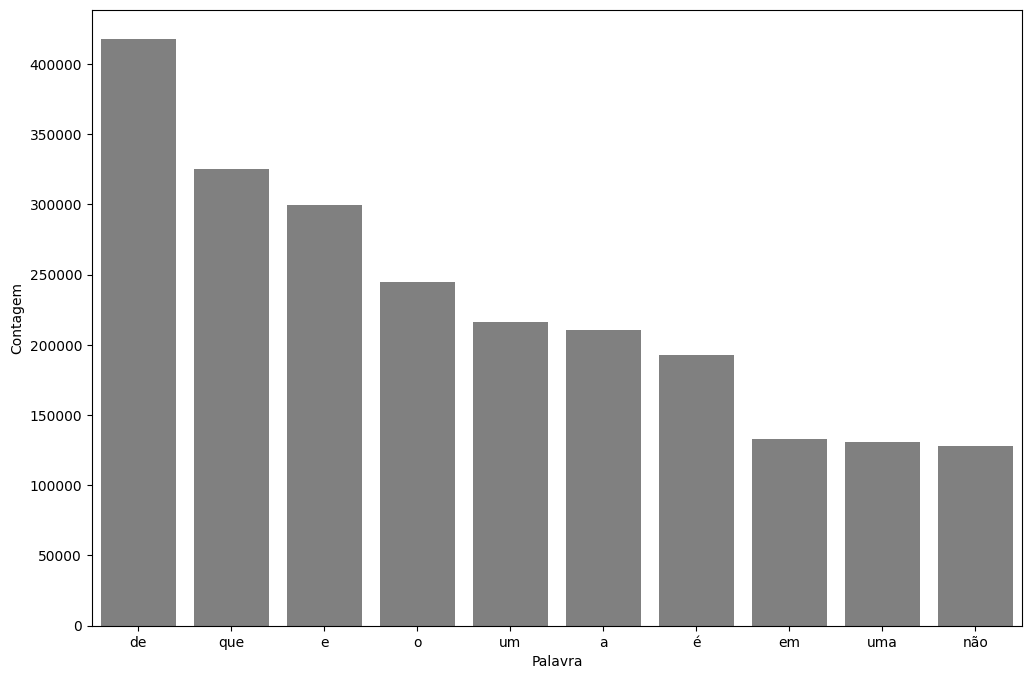

In [47]:
pareto(resenha, 'text_pt', 10)

## Para saber mais

No vídeo desta aula foi criado uma função, chamada de _pareto_, para plotar um gráfico de barras ordenado pela frequência. Embora a função tenha esse nome, ela não gera um gráfico de pareto. Teoricamente, para ser um gráfico de pareto, é necessário apresentar um eixo secundário com a taxa acumulada.

Para quem quiser saber mais sobre o princípio de pareto, pode acessar esse [link](https://pt.wikipedia.org/wiki/Princ%C3%ADpio_de_Pareto).

Para ver um exemplo de gráfico de pareto e mais explicação, pode acessar este [link](https://pt.wikipedia.org/wiki/Diagrama_de_Pareto).

Segue o código do nosso aluno João, que criou a visualização do pareto neste [link](https://cursos.alura.com.br/forum/topico-sugestao-p-complementar-o-grafico-de-pareto-116647).


In [51]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [53]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [54]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6810351799433886

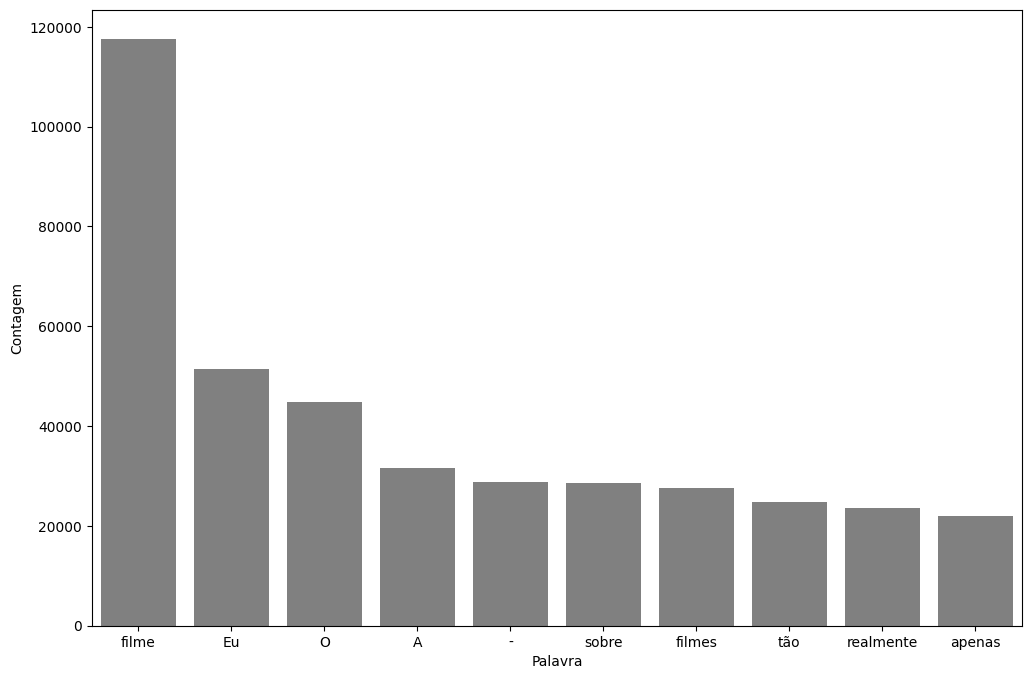

In [55]:
pareto(resenha, 'tratamento_1', 10)